In [1]:
import math
import pandas as pd
import numpy as np
import random
from scipy.interpolate import UnivariateSpline
from scipy.stats import rankdata
from scipy.special import logit as logit
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
net_file = "./data/Liver_net_matrix.csv"
from scipy import sparse

In [20]:
import networkx as nx
G = nx.binomial_graph(10000, 0.002)
A = nx.adjacency_matrix(G,weight='unweight')

A = A.toarray()
net_matrix = BOSAM_Sort(A)
print(net_matrix.shape)


(10000, 10000)


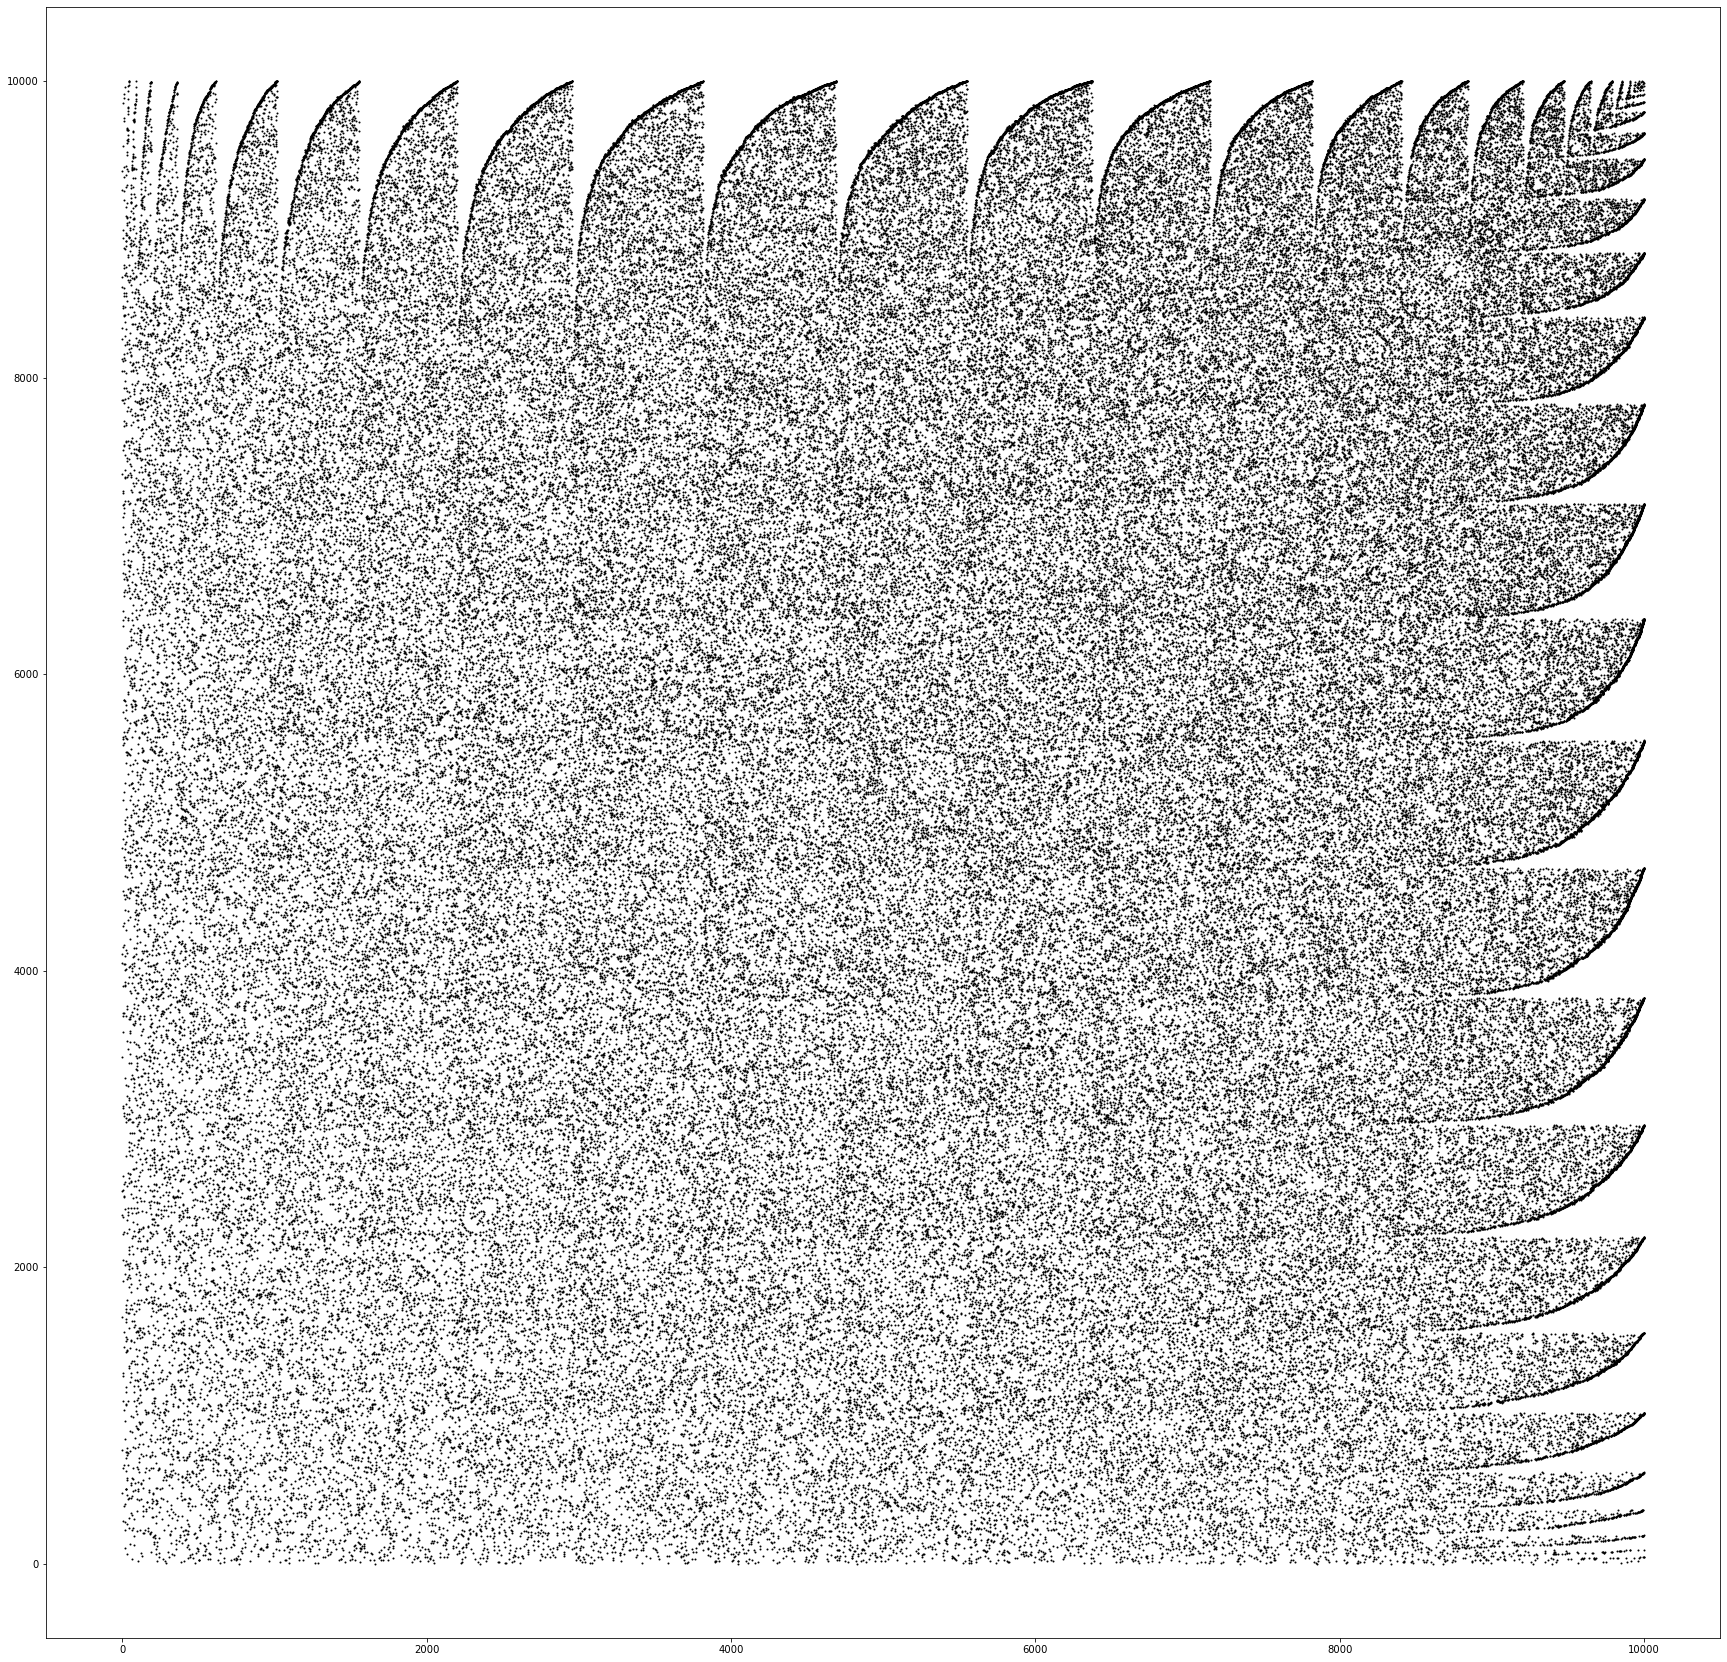

In [115]:

net_matrix_sparse = sparse.csr_matrix(net_matrix)
c = net_matrix_sparse.tocoo()
# c.row
# c.col
plt.figure(figsize=(30,30))
plt.scatter(c.row, c.col,c="black",marker = 'o', s=1)

# plt.figure(figsize=(100,100))
# plt.imshow(net_matrix, cmap='Greys',vmin=0, vmax=1, interpolation='nearest')

In [2]:
def max_neighb_idx(arr):
    arr = arr[::-1]
    i = len(arr) - np.argmax(arr) - 1
    return i

def net_matrix_clean(net_matrix):
    net_matrix = np.copy(net_matrix)
    idx = np.argwhere(np.all(net_matrix[..., :] == 0, axis=0))
    net_matrix = np.delete(net_matrix, idx, axis=1)
    net_matrix = np.delete(net_matrix, idx, axis=0)
    return net_matrix

def BOSAM_Sort(net_matrix):
    net_degree = net_matrix.sum(axis = 1)
    net_max_nei_degrees = []

    for each_node in net_matrix:
        max_nei_degree = 0
        for i in range(len(each_node)):
            if each_node[i]>0 and net_degree[i]>max_nei_degree:
                max_nei_degree = net_degree[i]
        net_max_nei_degrees.append(max_nei_degree)
    net_max_nei_degrees = np.array(net_max_nei_degrees)
    arr_argsort = np.lexsort((net_max_nei_degrees,net_degree)) # sort by degree then max_neighbour
    infer_sorted_net_matrix = net_matrix[:, arr_argsort][arr_argsort, :]
#     print(infer_sorted_net_matrix)
    third_rule = np.apply_along_axis(max_neighb_idx, 1, infer_sorted_net_matrix)
#     print(third_rule)
    net_degree = net_degree[arr_argsort]
    net_max_nei_degrees = net_max_nei_degrees[arr_argsort]
#     print(third_rule,net_max_nei_degrees,net_degree)
    arr_argsort = np.lexsort((third_rule,net_max_nei_degrees,net_degree))
#     print(arr_argsort)
    sorted_arr = infer_sorted_net_matrix[:, arr_argsort][arr_argsort, :]
#     print(sorted_arr)
    return sorted_arr


(10, 10)
(432, 432)
(443, 443)
(477, 477)


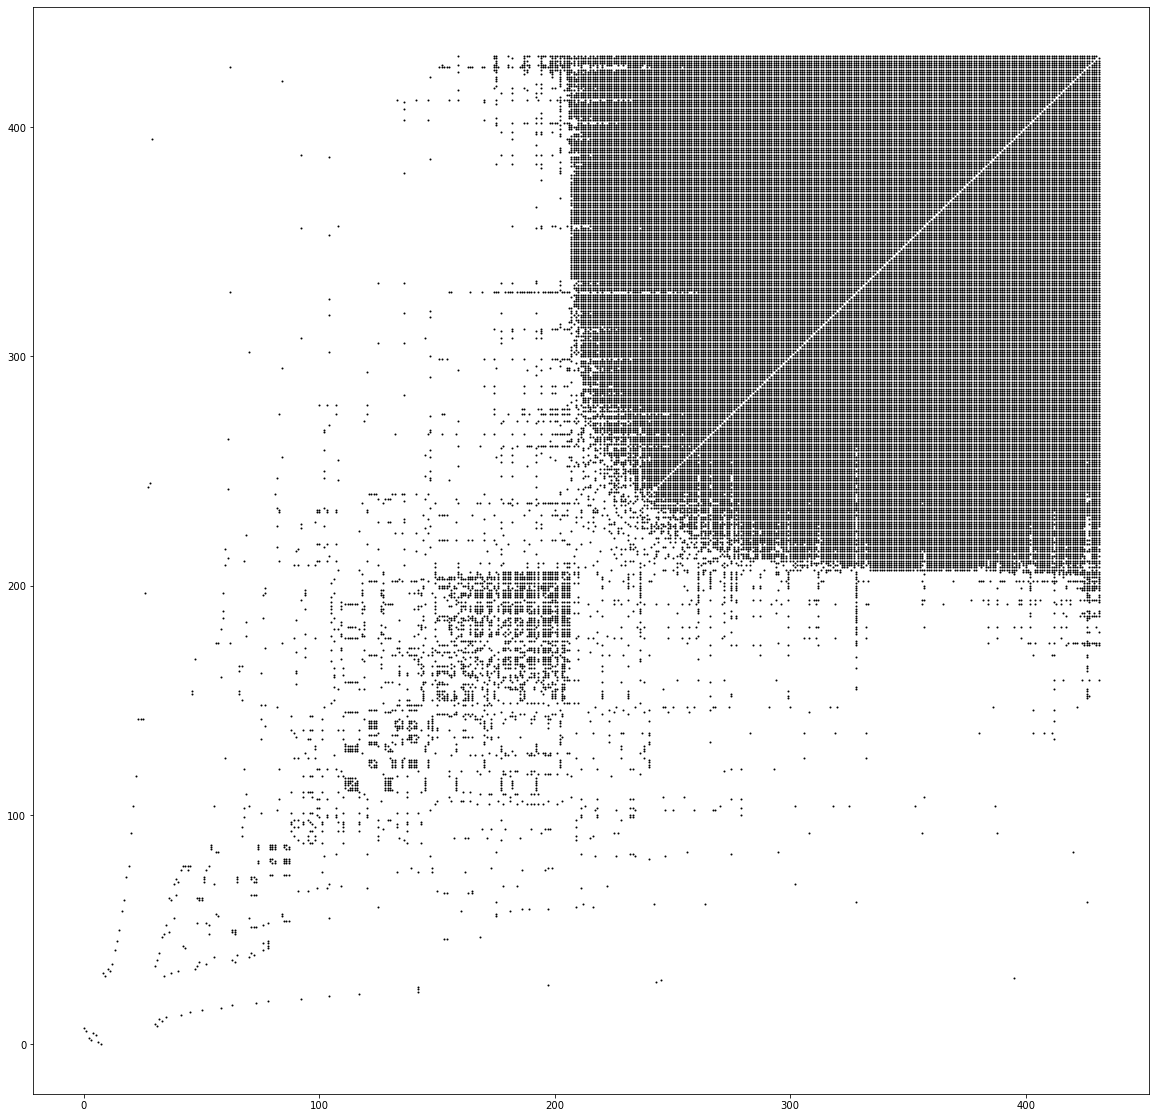

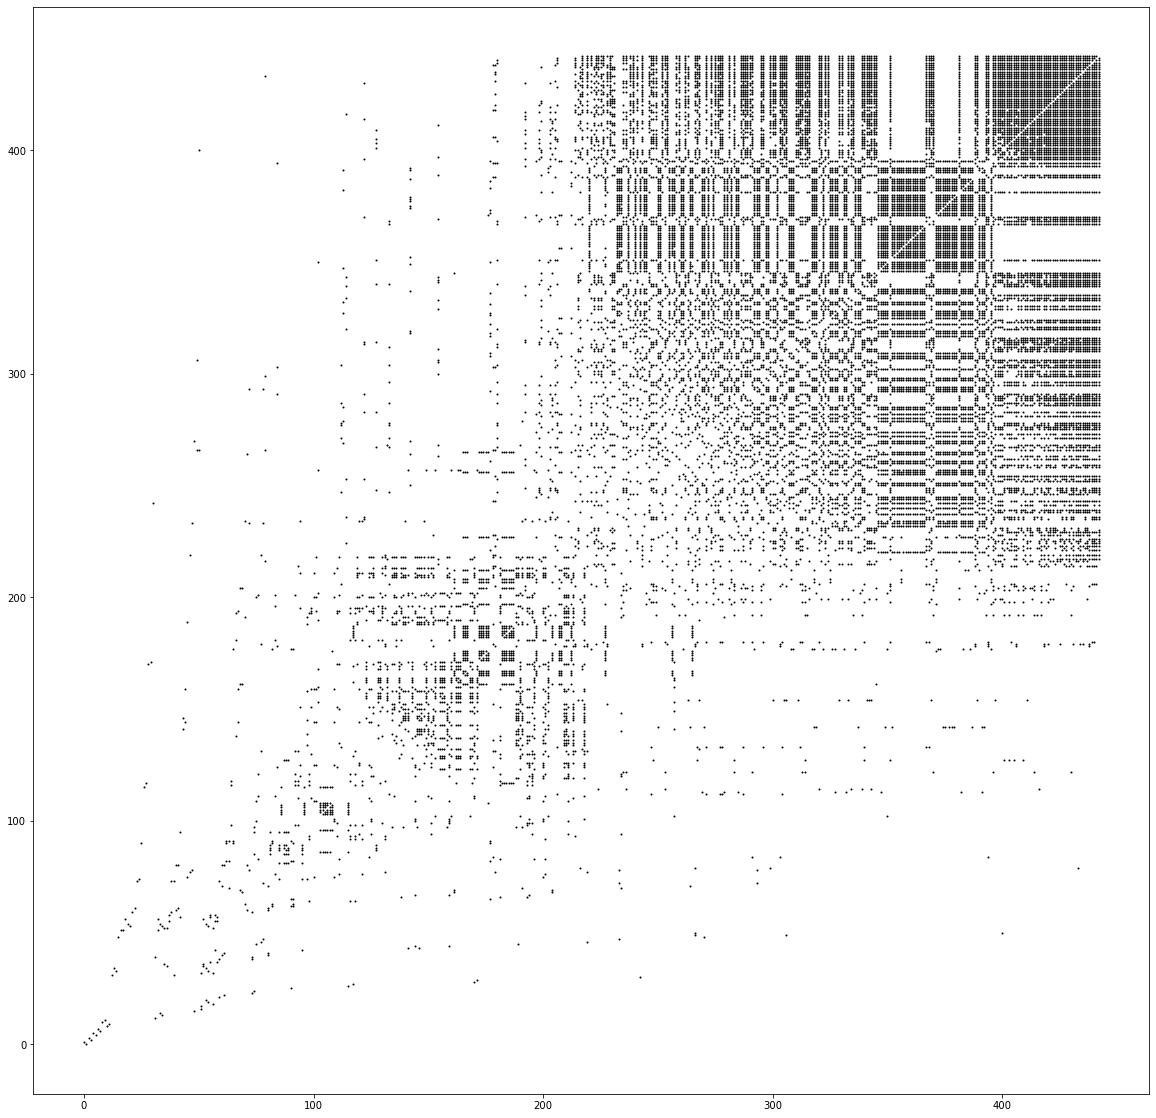

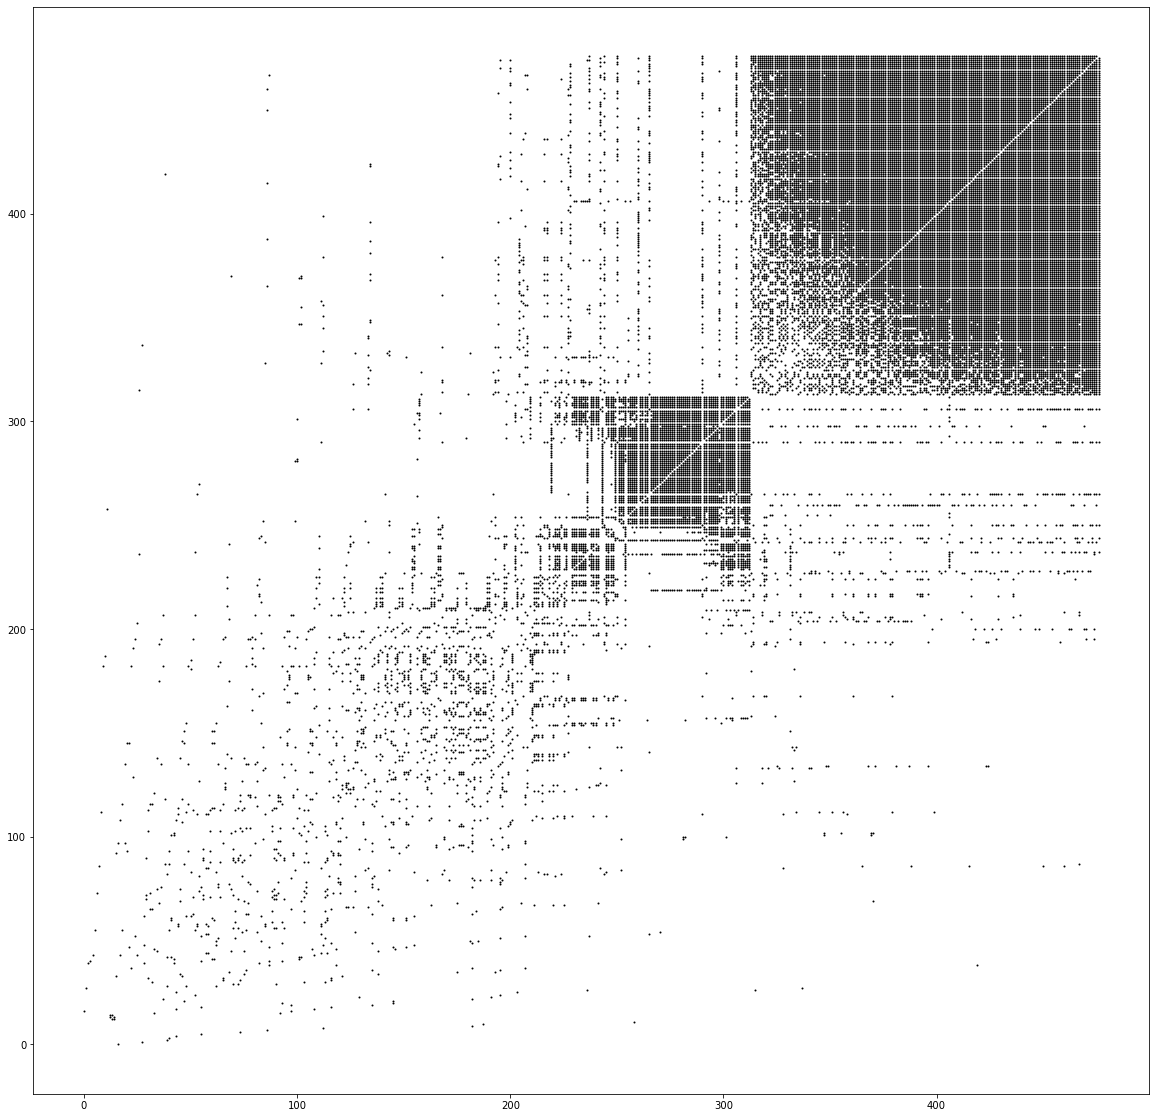

In [23]:

df = pd.read_csv(net_file).drop(columns=['Unnamed: 0'])
net_matrix = np.array(df)[10:20,10:20]
print(net_matrix.shape)
net_matrix = net_matrix_clean(net_matrix)
net_matrix = BOSAM_Sort(net_matrix)
net_matrix

net_files = ["./data/LN_net_matrix.csv","./data/Bone_net_matrix.csv","./data/Liver_net_matrix.csv"]

for net_file in net_files:
    df = pd.read_csv(net_file).drop(columns=['Unnamed: 0'])
    net_matrix = np.array(df)
    net_matrix = net_matrix_clean(net_matrix)
    net_matrix = BOSAM_Sort(net_matrix)
    print(net_matrix.shape)
    
    net_matrix_sparse = sparse.csr_matrix(net_matrix)
    c = net_matrix_sparse.tocoo()
    plt.figure(figsize=(20,20))
    plt.scatter(c.row, c.col,marker='o',c='black', s=1)
#     c.row
#     c.col
#     plt.figure(figsize=(20,20))
#     plt.imshow(net_matrix, cmap='Greys',vmin=0, vmax=1, interpolation='nearest')

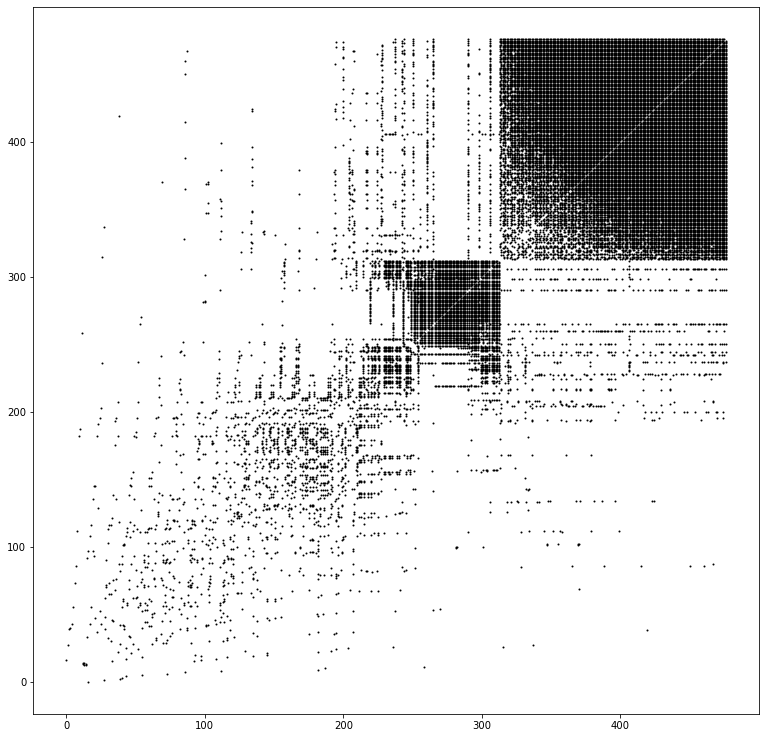

In [30]:
# plt.figure(figsize=(20,20))
# plt.imshow(net_matrix, cmap='Greys',vmin=0, vmax=1, interpolation='nearest')
net_matrix_sparse = sparse.csr_matrix(net_matrix)
c = net_matrix_sparse.tocoo()
plt.figure(figsize=(13,13))
plt.scatter(c.row, c.col,marker='o',c='black', s=1)

In [2]:
df = pd.read_csv(net_file).drop(columns=['Unnamed: 0'])
net_matrix = np.array(df)[100:110,100:110]

idx = np.argwhere(np.all(net_matrix[..., :] == 0, axis=0))
net_matrix = np.delete(net_matrix, idx, axis=1)
net_matrix = np.delete(net_matrix, idx, axis=0)
print(idx)
net_matrix

[[5]]


array([[0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 0., 0., 0., 1., 0.]])

In [5]:
net_matrix[483]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
net_adj_mat = []
for j in range(net_matrix.shape[0]):
    current_list = []
    for k in range(net_matrix.shape[1]):
#         if j == 483:
# #             print(net_matrix[j,k])
        if net_matrix[j,k] >0:
            current_list.append(k)
#     current_list = np.array(current_list)
    net_adj_mat.append(current_list)
# print(len(net_infor_arr),
# len(net_infor_arr[180]),
# len(net_infor_arr[197]))
# net_infor_arr = np.array(net_infor_arr)
net_adj_mat

[[1,
  9,
  21,
  22,
  45,
  49,
  54,
  68,
  83,
  87,
  88,
  89,
  91,
  93,
  94,
  96,
  98,
  99,
  100,
  101,
  104,
  106,
  107,
  109,
  110,
  117,
  122,
  124,
  128,
  132,
  134,
  138,
  142,
  145,
  146,
  153,
  155,
  163,
  179,
  180,
  185,
  194,
  197,
  200,
  217,
  218,
  221,
  223,
  225,
  228,
  233,
  234,
  248,
  249,
  250,
  254,
  259,
  260,
  275,
  285,
  289,
  302,
  313,
  322,
  336,
  341,
  342,
  351,
  379,
  390,
  393,
  403,
  413,
  415,
  418,
  438,
  439,
  444,
  447,
  452,
  476,
  486],
 [0, 9, 21, 138, 185, 225, 415, 439],
 [4, 22, 45, 49, 87, 93, 104, 109, 110, 124, 153, 194, 200, 342],
 [5,
  17,
  19,
  24,
  32,
  44,
  47,
  52,
  57,
  59,
  62,
  67,
  78,
  80,
  81,
  82,
  102,
  112,
  119,
  133,
  151,
  160,
  164,
  171,
  183,
  189,
  192,
  196,
  202,
  207,
  214,
  216,
  238,
  239,
  256,
  264,
  265,
  280,
  282,
  293,
  305,
  309,
  326,
  331,
  348,
  352,
  362,
  366,
  368,
  396,
  408,
 

In [83]:
net_node_degree_list = []
for i in range(len(net_infor_arr)):
    net_node_degree_list.append(len(net_infor_arr[i]))
    
len(net_node_degree_list)
net_node_degree_list.count(0)

49

# Testing area

In [103]:
x = np.array([[0,0,1,2,3],[0,0,1,1,2]])

x[:,x[0, :] != 0]

array([[1, 2, 3],
       [1, 1, 2]])

In [3]:
df = pd.read_csv(net_file).drop(columns=['Unnamed: 0'])
net_matrix = np.array(df)[10:20,10:20]


df = pd.read_csv(net_file).drop(columns=['Unnamed: 0'])
net_matrix = np.array(df)[10:20,10:20]
df = pd.DataFrame(net_matrix)

net_degree = np.array(df.sum())
print(net_degree)
net_matrix.sum(axis = 0)

[5. 5. 2. 2. 6. 5. 4. 5. 0. 6.]


array([5., 5., 2., 2., 6., 5., 4., 5., 0., 6.])

In [4]:
df = pd.read_csv(net_file).drop(columns=['Unnamed: 0'])
net_matrix = np.array(df)[10:20,10:20]
df = pd.DataFrame(net_matrix)

net_degree = np.array(df.sum())
df['degree'] = net_degree
df



# df = pd.read_csv(net_file).drop(columns=['Unnamed: 0'])
# net_matrix = np.array(df)[10:20,10:20]
# df = pd.DataFrame(net_matrix)

# net_degree = np.array(df.sum())
# df['degree'] = net_degree


# print(df)

# arr_argsort = np.array(np.argsort(net_degree))
# print('arr_argsort', arr_argsort)

# net_degree = np.array(df['degree'])[arr_argsort]  # keep this for latter use

# infer_sorted_arr = net_matrix[:, arr_argsort][arr_argsort, :]
# df = pd.DataFrame(infer_sorted_arr)
# df

# net_max_nei_degrees = []

# for each_node in infer_sorted_arr:
#     max_nei_degree = 0
#     for i in range(len(each_node)):
#         if each_node[i]>0 and net_degree[i]>max_nei_degree:
#             max_nei_degree = net_degree[i]
#     net_max_nei_degrees.append(max_nei_degree)
# print(net_degree)
# net_max_nei_degrees

,0,1,2,3,4,5,6,7,8,9,degree
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,6.0
5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0
6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0
7,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,6.0


In [5]:
# df = pd.DataFrame(infer_sorted_arr)
net_max_nei_degrees = []

for each_node in net_matrix:
    max_nei_degree = 0
    for i in range(len(each_node)):
        if each_node[i]>0 and net_degree[i]>max_nei_degree:
            max_nei_degree = net_degree[i]
    net_max_nei_degrees.append(max_nei_degree)
print(net_degree)
net_max_nei_degrees

[5. 5. 2. 2. 6. 5. 4. 5. 0. 6.]


[6.0, 6.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0, 0, 6.0]

In [34]:
sort_rules = [net_degree, net_max_nei_degrees]
print(sort_rules)
sort_order  = np.lexsort((sort_rules[1],sort_rules[0])) # sort by degree then max_neighbour

[array([5., 5., 2., 2., 6., 5., 4., 5., 0., 6.]), [6.0, 6.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0, 0, 6.0]]


In [35]:
print(net_degree)
print(net_degree[sort_order])

[5. 5. 2. 2. 6. 5. 4. 5. 0. 6.]
[0. 2. 2. 4. 5. 5. 5. 5. 6. 6.]


In [8]:
infer_sorted_arr = net_matrix[:, arr_argsort][arr_argsort, :]
df = pd.DataFrame(infer_sorted_arr)
df

NameError: name 'arr_argsort' is not defined